<a href="https://colab.research.google.com/github/yashveersinghsohi/Hands_On_ML_Book_Practice/blob/master/Chapter_1/Chapter1_Linear_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Packages

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Data

In [29]:
root_dir = "https://raw.githubusercontent.com/yashveersinghsohi/Hands_On_ML_Book_Practice/master/Chapter_1/"

bli_path = root_dir + "oecd_bli_2015.csv"
gdp_path = root_dir + "gdp_per_capita.csv"

In [30]:
bli_data = pd.read_csv(bli_path, thousands=",")
print(bli_data.shape)
bli_data.head()

(3292, 17)


,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [37]:
gdp_data = pd.read_csv(gdp_path, thousands=",", delimiter="\t", 
                       encoding='latin1', na_values="n/a")
print(gdp_data.shape)
gdp_data.head()

(190, 7)


,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


# Data Processing

In [49]:
bli_data_tot = bli_data[bli_data["INEQUALITY"] == "TOT"][["Country", "Indicator", "Value"]]
bli_data_tot = bli_data_tot[bli_data_tot["Indicator"] == "Life satisfaction"][["Country", "Value"]]
bli_data_tot.set_index("Country", inplace=True)
bli_data_tot

,Value
Country,
Australia,7.3
Austria,6.9
Belgium,6.9
Canada,7.3
Czech Republic,6.5
Denmark,7.5
Finland,7.4
France,6.5
Germany,7.0


In [53]:
gdp_data_2015 = gdp_data[["Country", "2015"]].copy()
gdp_data_2015.rename(columns={"2015": "GDP"}, inplace=True)
gdp_data_2015.set_index("Country", inplace=True)
gdp_data_2015

,GDP
Country,
Afghanistan,599.994
Albania,3995.383
Algeria,4318.135
Angola,4100.315
Antigua and Barbuda,14414.302
...,...
Vietnam,2088.344
Yemen,1302.940
Zambia,1350.151


In [60]:
country_idxs = list(set(bli_data_tot.index).intersection(set(gdp_data_2015.index)))

df = pd.merge(left=bli_data_tot.loc[country_idxs, :], 
              right=gdp_data_2015.loc[country_idxs, :], 
              left_index=True, 
              right_index=True)
df

,Value,GDP
Country,,
Estonia,5.6,17288.083
Denmark,7.5,52114.165
Hungary,4.9,12239.894
Spain,6.5,25864.721
Czech Republic,6.5,17256.918
United States,7.2,55805.204
Slovak Republic,6.1,15991.736
Iceland,7.5,50854.583
Italy,6.0,29866.581


# Data Visualization

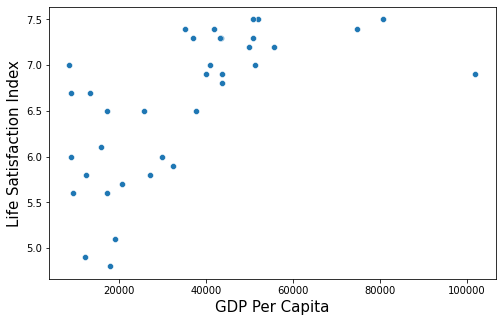

In [67]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.scatterplot(x="GDP", y="Value", data=df, ax=ax)

plt.xlabel("GDP Per Capita", size=15)
plt.ylabel("Life Satisfaction Index", size=15)

plt.show()

# Linear Model

In [69]:
X = df["GDP"].to_numpy().reshape(-1, 1)
y = df["Value"]

lin_reg = LinearRegression().fit(X, y)
lin_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
lin_reg.coef_, lin_reg.intercept_

(array([2.3177337e-05]), 5.763029861307919)

# Predictions

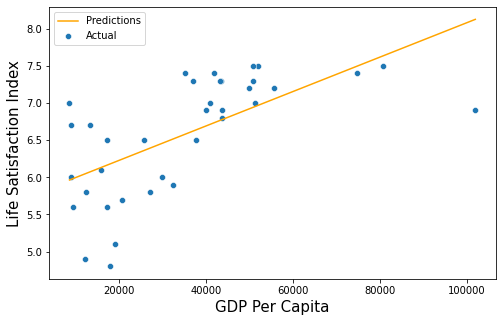

In [75]:
y_hat = lin_reg.predict(X)

fig, ax = plt.subplots(figsize=(8, 5))
sns.scatterplot(x="GDP", y="Value", data=df, ax=ax, label="Actual")
sns.lineplot(x=X.reshape(-1,), y=y_hat, ax=ax, color="orange", label="Predictions")

plt.xlabel("GDP Per Capita", size=15)
plt.ylabel("Life Satisfaction Index", size=15)

plt.legend()
plt.show()